In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-shoes-data/amazon_uk_shoes_reviews-metadata.json
/kaggle/input/amazon-shoes-data/amazon_uk_shoes_products_dataset_2021_12.csv
/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv


INDEX

1. DATA READING AND INFO
2. INITIAL VISUALS OF DATA
3. CREATING OF WORDCLOUD
4. SENTIMENTAL ANALYSIS
5. SA VISAULIZATION AND FINDINGS

In [2]:
#IMPORTING OF NECESSARY LIABRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


1. # DATA READING AND INFO

In [3]:
#READING THE DATA AND PRINTING THE SHAPE
df=pd.read_csv("/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv") #Reading the file
df.shape #Checking shape of data

(205052, 6)

In [4]:
df.head(3) #Checking head of data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive


In [5]:
df.index.name="Index" #Setting of Index name


In [6]:
#Cleaning of reviews
def clean(text):
    text = str(text).lower() #Setting text in lower letters
    text = re.sub('\[.*?\]', '', text) #Removing signs
    text = re.sub('https?://\S+|www\.\S+', '', text) #Removing links
    text = re.sub('<.*?>+', '', text) #Removing signs like <>?
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #Removing punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["Summary"] = df["Summary"].apply(clean) #applying of above cleaning in dataset

2. #  INITIAL VISUALS OF DATA

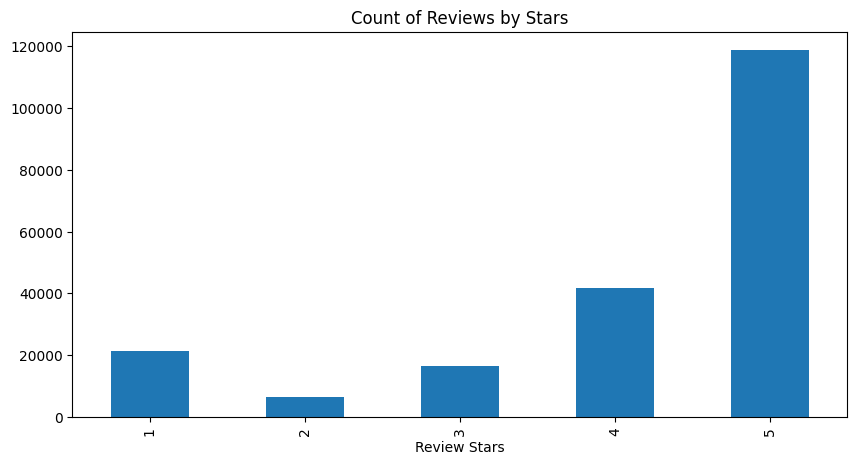

In [27]:
#Visual of ratings 
ax = df['Rate'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
#Checking of rating category
np.array(pd.Categorical(df['Rate']).categories)

array(['1', '2', '3', '4', '5', 'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)'],
      dtype=object)

In [9]:
#Dropping of wrong inputs
df.drop(index =[175906,17299,175895],axis=0,inplace=True)

3. # WORDCLOUD

In [10]:
#Checking one of the row details
df.iloc[41623]

product_name     Indigo Creatives Large Size Swimming Ring With...
product_price                                                  899
Rate                                                             1
Review                                             waste of money!
Summary                          bad producthand tube help protect
Sentiment                                                 negative
Name: 41624, dtype: object

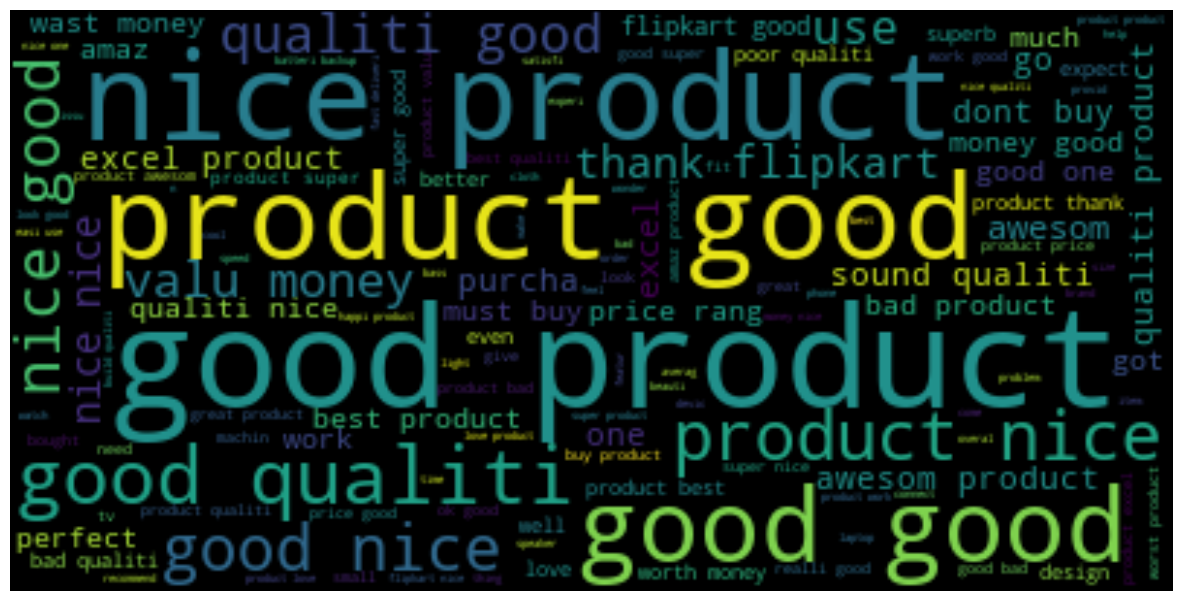

In [11]:
#Creating of wordcloud
text = " ".join(i for i in df.Summary)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
#Copying df to create a dummy
dfr=df.copy()

4. # SENTIMENTAL ANALYSIS 

In [15]:
#Polarizing data
nltk.download('vader_lexicon') #Downloading of vader lexicon for scores
sentiments = SentimentIntensityAnalyzer() #Using sentiment analyser
# pos,neg and neutal scores in summary
dfr["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Summary"]]
dfr["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Summary"]]
dfr["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Summary"]]
dfr["Combined"] = [sentiments.polarity_scores(i)["compound"] for i in df["Summary"]]
dfr = dfr[["Summary", "Positive", "Negative", "Neutral","Combined"]]
print(df.head(7))

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
                                            product_name product_price Rate  \
Index                                                                         
0      Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1      Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2      Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3      Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4      Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
5      Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
6      Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   

                   Review                                            Summary  \
Index                                                                          
0      

In [23]:
dfr["RATE"]=df["Rate"]

In [24]:
#Checking of dummy data with analysis
dfr

,Summary,Positive,Negative,Neutral,Combined,RATE
Index,,,,,,
0,great cooler excel air flow price amaz unbelie...,0.653,0.000,0.347,0.9062,5
1,best budget fit cooler nice cool,0.855,0.000,0.145,0.8957,5
2,qualiti good power air decent,0.420,0.000,0.580,0.4404,3
3,bad product fan,0.338,0.515,0.147,-0.2960,1
4,ok ok product,0.815,0.000,0.185,0.5267,3
...,...,...,...,...,...,...
205047,good product,0.744,0.000,0.256,0.4404,5
205048,nice,1.000,0.000,0.000,0.4215,5
205049,nice fast deliveri,0.583,0.000,0.417,0.4215,3


5. # SA VISULAIZATION

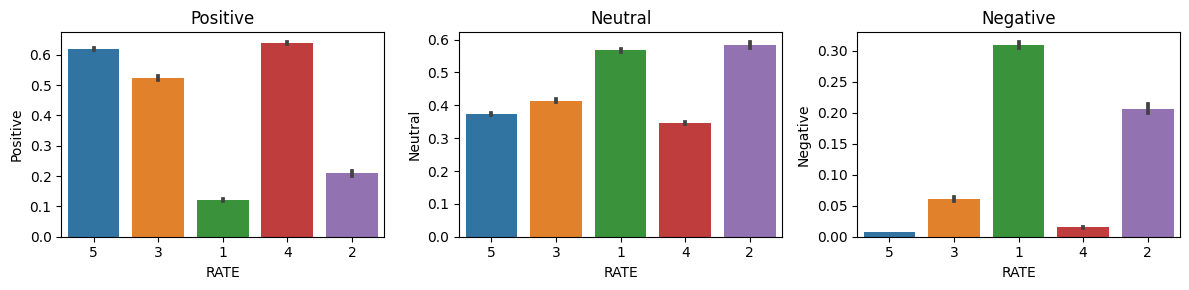

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=dfr, x='RATE', y='Positive', ax=axs[0])
sns.barplot(data=dfr, x='RATE', y='Negative', ax=axs[2])
sns.barplot(data=dfr, x='RATE', y='Neutral', ax=axs[1])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


# Analysis Finding 

In positive we can see more positive score for high ratings as compared to low ratings.

In neutarl we can see more neutral score for low and moderate rating as compared to top ratings.

In negative we can see more negative score for low ratings as compared to high ratings.

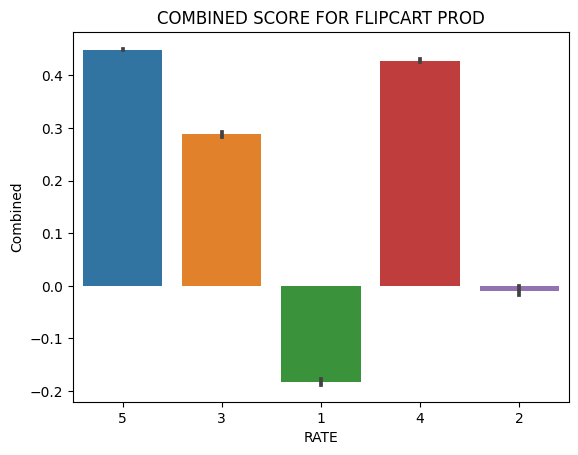

In [29]:
#COMPOUND SCORE
ax = sns.barplot(data=dfr, x='RATE', y='Combined')
ax.set_title('COMBINED SCORE FOR FLIPCART PROD')
plt.show()

# Analysis finding

We can see above more the rating indiactes a higher positve combined score

whereas for low ratings there is a low and negative combined score